# Pregunta 1

## a) Fractales regulares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Squaresbueno(x1,y1,L,n):
    '''
        x1,y1: coordenadas del vertice izquierdo L: longitud del triangulo a subdividir 
        n: número de interaciones
    '''
    
    if  n>0:
        Ln=L/3
        x2=x1+Ln
        x3=x1+2*Ln
        x4=x1+3*Ln
        y2=y1+Ln
        y3=y1+2*Ln
        y4=y1+3*Ln
        Squaresbueno(x1,y1,Ln,n-1)
        Squaresbueno(x2,y1,Ln,n-1)
        Squaresbueno(x3,y1,Ln,n-1)
        Squaresbueno(x1,y2,Ln,n-1)
        Squaresbueno(x3,y2,Ln,n-1)
        Squaresbueno(x1,y3,Ln,n-1)
        Squaresbueno(x1,y2,Ln,n-1) 
        Squaresbueno(x2,y3,Ln,n-1)     
    else:
        cuadrado = plt.Rectangle((x1, y1),L,L,color='r')
        ax.add_patch(cuadrado)

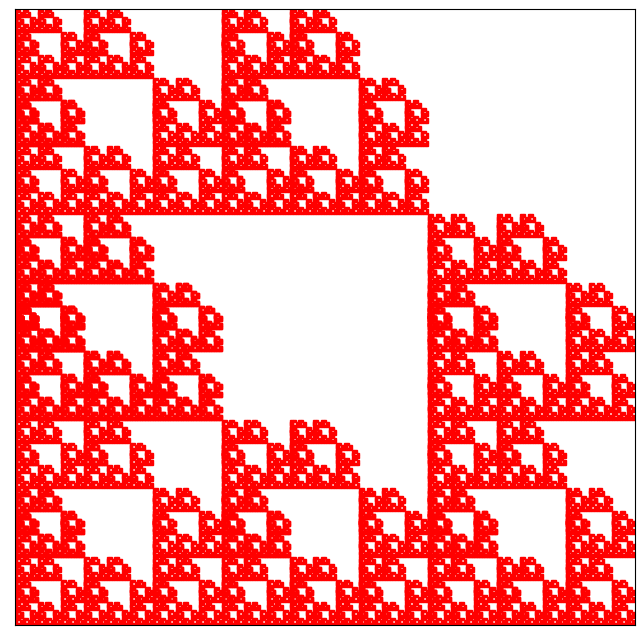

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_xticks([])
ax.set_yticks([])
n = 5
Squaresbueno(0,0,600,n)
plt.show()

## b) Dimensión fractal

In [4]:
Df=np.log(7)/np.log(3)
print(Df)

1.7712437491614221


# Pregunta 2

## a) Función de recocido simulado

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def recocido(Tmax,Tmin,funcion,tau,x):
    t = 0
    T = Tmax
    fx = funcion(x)
    Fx = [fx]
    X = [x]

    while T>Tmin:
        T = Tmax*np.exp(-t/tau) 
        dx = np.random.normal(0,1) 
        oldfx = fx
        oldx = x
        x = x+dx
        fx = funcion(x)
        deltafx = fx - oldfx
    
        if np.random.random() > np.exp(-deltafx/T): 
            x = oldx 
            fx = oldfx
        Fx.append(fx)
        X.append(x)    
        t += 1
    return x

## b) Función

In [7]:
def funcion(x):
    return (4-x**2)**2+x

In [8]:
a = np.linspace(-3, 3, 100)
y=funcion(a)

### Gráfica de función

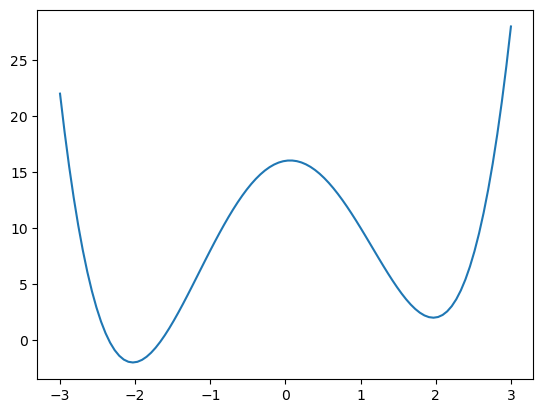

In [9]:
plt.plot(a,y)

### Mínimo absoluto usando recocido

In [10]:
min1=recocido(10,1e-4,funcion,1e5,2)
print(min1)

-2.026102743482866


In [11]:
min2=recocido(10,1e-9,funcion,1e5,2)
print(min2)

-2.030559759761629


In [12]:
minreal=-2.03054661535337

In [13]:
error1=abs(minreal-min1)/minreal*100
error2=abs(minreal-min2)/minreal*100
print(error1,error2)

-0.21885101464322107 -0.0006473334893834787


### Discusión

#### Para aumentar la precisión lo que se tiene que hacer es disminuir la temperatura menor, debido a la forma en que trabaja el algoritmo de recocido, la precicisón se beneficiara de una temperatura menor.

### Intento maximo

In [22]:
def recocidomax(Tmax,Tmin,funcion,tau,x):
    t = 0
    T = Tmax
    fx = funcion(x)
    Fx = [fx]
    X = [x]

    while T>Tmin:
        T = Tmax*np.exp(-t/tau) 
        dx = np.random.normal(0,1) 
        oldfx = fx
        oldx = x
        x = x+dx
        fx = funcion(x)
        deltafx = fx - oldfx
    
        if np.random.random() < np.exp(-deltafx/T): 
            x = oldx 
            fx = oldfx
        Fx.append(fx)
        X.append(x)    
        t += 1
    return x

In [26]:
max=recocidomax(10,1e-5,funcion,1e5,0.5)
print(max)

/var/folders/jb/60_98sg10y12km6nlm43yctc0000gn/T/ipykernel_46888/2808260732.py:17: RuntimeWarning: overflow encountered in exp
  if np.random.random() < np.exp(-deltafx/T):


551161.5123733229
